# Home task : KNN classification
1. `iris` dataset
    - load `iris` dataset
    - split to train and test
    - train KNN classifiers for different `K`
    - choose the best `K` determined on test set

2. synthetic dataset
    - generrate synthetic dataset
    - split to train and test
    - train KNN regressors for different `K`
    - choose the best `K` determined on test set
    - visualize the decision boundary 




## `Iris` dataset 

In [5]:
import pandas as pd 
import numpy as np 
np.random.seed = 2021
from sklearn.datasets import load_iris
iris = load_iris()
print ('data contains:',iris.keys())

iris_data_target = np.append(iris.data, iris.target.reshape([iris.target.shape[0], 1]), axis=1)
np.random.shuffle(iris_data_target) 

X = iris_data_target[:, 0:4]
Y = iris_data_target[:, 4]

labels, feature_names  = iris.target_names, iris['feature_names']
data_frame_iris= pd.DataFrame(X, columns= feature_names) 
data_frame_iris['label'] =  Y
features_dict = {k:v for k,v in  enumerate(labels)}
data_frame_iris['label_names'] = data_frame_iris.label.apply(lambda x: features_dict[x])
data_frame_iris

data contains: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/datasets/base.py:241: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/datasets/base.py:245: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to revie

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,6.3,3.4,5.6,2.4,2.0,virginica
1,5.7,3.0,4.2,1.2,1.0,versicolor
2,6.2,2.9,4.3,1.3,1.0,versicolor
3,4.8,3.4,1.6,0.2,0.0,setosa
4,7.2,3.0,5.8,1.6,2.0,virginica
...,...,...,...,...,...,...
145,6.4,2.8,5.6,2.1,2.0,virginica
146,5.7,4.4,1.5,0.4,0.0,setosa
147,5.9,3.0,5.1,1.8,2.0,virginica
148,6.5,3.0,5.8,2.2,2.0,virginica


In [7]:
from sklearn.preprocessing import MinMaxScaler
MM = MinMaxScaler()
X = MM.fit_transform(X)

X

array([[0.55555556, 0.58333333, 0.77966102, 0.95833333],
       [0.38888889, 0.41666667, 0.54237288, 0.45833333],
       [0.52777778, 0.375     , 0.55932203, 0.5       ],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.80555556, 0.41666667, 0.81355932, 0.625     ],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.69444444, 0.33333333, 0.6440678 , 0.54166667],
       [0.13888889, 0.58333333, 0.15254237, 0.04166667],
       [0.19444444, 0.54166667, 0.06779661, 0.04166667],
       [0.33333333, 0.625     , 0.05084746, 0.04166667],
       [0.44444444, 0.5       , 0.6440678 , 0.70833333],
       [0.58333333, 0.33333333, 0.77966102, 0.875     ],
       [0.19444444, 0.125     , 0.38983051, 0.375     ],
       [0.55555556, 0.54166667, 0.62711864, 0.625     ],
       [0.05555556, 0.125     , 0.05084746, 0.08333333],
       [0.66666667, 0.45833333, 0.62711864, 0.58333333],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.52777778, 0.33333333,

In [18]:
k_best = 0 
score_best = float(0) 
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = 0 , score = 0.0


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_maximum = 50 

for K in range(1, k_maximum + 1): 
    classifier = KNeighborsClassifier(K) 
    classifier.fit(X_train, Y_train)

    Y_pred = classifier.predict(X_test)

    accuracy = metrics.accuracy_score(Y_test, Y_pred)
    if accuracy > score_best:
        k_best = K
        score_best = accuracy
    
print(f"Best is {K} and best acurracy {accuracy}")


Best is 50 and best acurracy 0.8222222222222222


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neighbors/base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)
/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/neighbors/base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review 

## Synthetic dataset  

In [31]:
from sklearn.datasets import make_blobs, make_regression
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['reg','#FFFF00','green','blue'])

np.random.seed= 2021
X_D2, Y_D2 = make_regression(n_samples = 1000, n_features = 4, random_state = 4)
Y_D2 = Y_D2 
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=Y_D2,
           marker= 'o', s=30, cmap=cmap_bold)



<IPython.core.display.Javascript object>

In [20]:
k_best = 0 
score_best = 0 
print ('The best k = {} , score = {}'.format(k_best,score_best ))

The best k = 0 , score = 0


In [21]:
from sklearn.preprocessing import StandardScaler

S_Scaler = StandardScaler()
X_D2 = S_Scaler.fit_transform(X_D2)
X_D2

array([[ 0.45840043,  0.65911802, -2.04284406, -0.79175776],
       [-1.09598189, -0.38618439, -0.35089588,  0.61548053],
       [-1.17412776, -0.73506488,  1.10800883, -1.89312137],
       ...,
       [ 1.70536849, -0.50804104,  1.47616186, -0.64076074],
       [-1.85219013, -1.21414428, -1.24276372, -0.40230543],
       [-0.11670086,  1.3697656 ,  1.76936828, -0.04308694]])

In [22]:
from sklearn.model_selection import train_test_split

X_train_D2, X_test_D2, Y_train_D2, Y_test_D2 = train_test_split(X_D2, Y_D2, train_size=0.7, test_size=0.3

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_maximum = 50 

for K in range(1, k_maximum + 1): 
    knn_r = KNeighborsRegressor(K) 
    knn_r.fit(X_train_D2, Y_train_D2) 

    Y_pred_D2 = knn_r.predict(X_test_D2)

    score = knn_r.score(X_test_D2, Y_test_D2)
    print(score)
    if score >  score_best :
        k_best = K
        score_best = score

print(f"Best K is {k_best}, score {score_best}")

0.915544995817408
0.9443830252733955
0.9554584797761759
0.9549755240012486
0.9560230963534123
0.9531967164133548
0.9551601159904962
0.9526771309408731
0.9526484559263587
0.9517532574593203
0.9504209644156232
0.9516744152597392
0.9497274091029292
0.9474194540324016
0.9463713279365945
0.9443960282695097
0.9435138793687412
0.9416250357911686
0.9410058822681474
0.9396500117509659
Best K is 5, score 0.9560230963534123


<IPython.core.display.Javascript object>


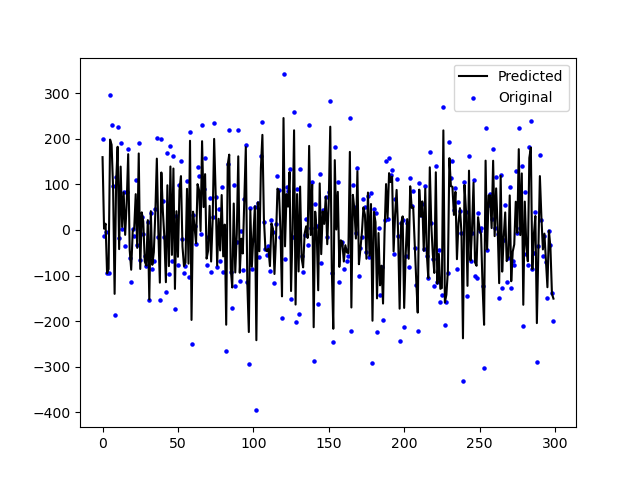

In [24]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(range(len(Y_test_D2)), Y_test_D2, s=5, color="red", label='Original')
plt.plot(range(len(Y_pred_D2)), Y_pred_D2, lw=1.5, color="green", label='Predicted')
plt.legend()
plt.show()